In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
crypto_df = pd.read_csv("CryptocoinsHistoricalPrices.csv")

In [3]:
crypto_df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market.Cap', 'coin', 'Delta'],
      dtype='object')

In [4]:
crypto_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
0,1,1/4/18,15270.7,15739.7,14522.2,15599.2,"21,783,200,000","256,250,000,000",BTC,0.021512
1,2,1/3/18,14978.2,15572.8,14844.5,15201.0,"16,871,900,000","251,312,000,000",BTC,0.014875
2,3,1/2/18,13625.0,15444.6,13163.6,14982.1,"16,846,600,000","228,579,000,000",BTC,0.099604
3,4,1/1/18,14112.2,14112.2,13154.7,13657.2,"10,291,200,000","236,725,000,000",BTC,-0.032242
4,5,12/31/17,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000",BTC,0.097591


In [5]:
#determine total number of altcoins
crypto_df["coin"].nunique()

1356

In [6]:
#filter out top 15 cryptocurrencies to analyze
top15 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")|(crypto_df["coin"]=="DASH")|
                      (crypto_df["coin"]=="XEM")|(crypto_df["coin"]=="XMR")|
                      (crypto_df["coin"]=="BTG")|(crypto_df["coin"]=="ETC")|
                      (crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:] 

In [7]:
#create a dataframe to look at the historic dats for close prices for each of the 15 cryptocurrencies 
top15 = top15[["Date", "Close", "coin"]]

In [8]:
#convert the date to datetime so we can use it in a plot 
top15.set_index(pd.to_datetime(top15["Date"], format = "%m/%d/%y"), inplace = True) 
top15["Date"]=pd.to_datetime(top15["Date"], format = "%m/%d/%y")
top15.head()

,Date,Close,coin
Date,,,
2018-01-04,2018-01-04,15599.2,BTC
2018-01-03,2018-01-03,15201.0,BTC
2018-01-02,2018-01-02,14982.1,BTC
2018-01-01,2018-01-01,13657.2,BTC
2017-12-31,2017-12-31,14156.4,BTC


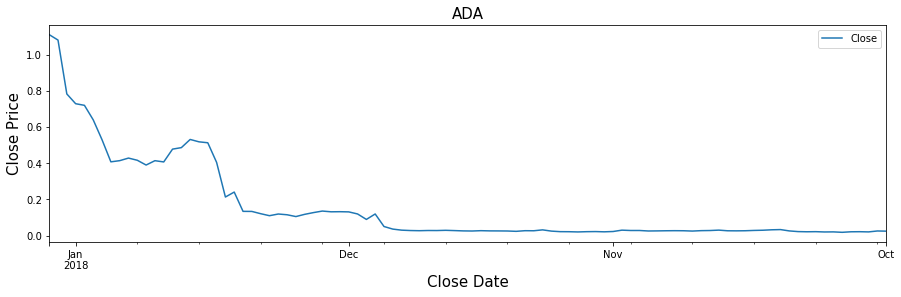

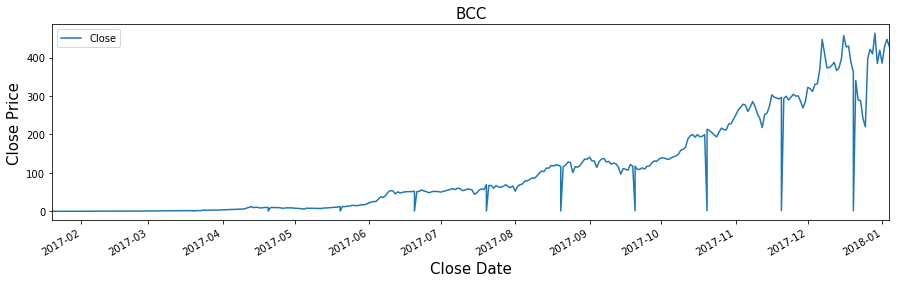

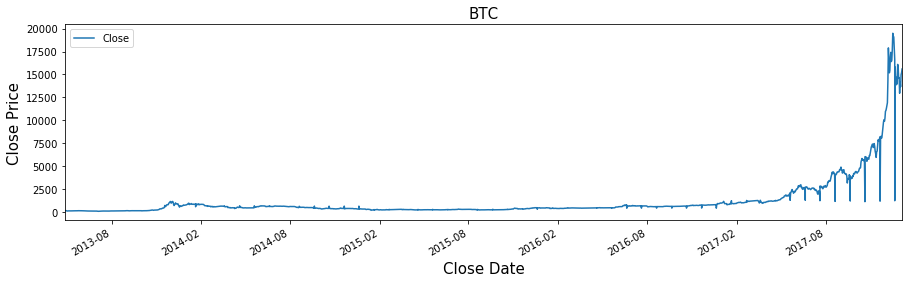

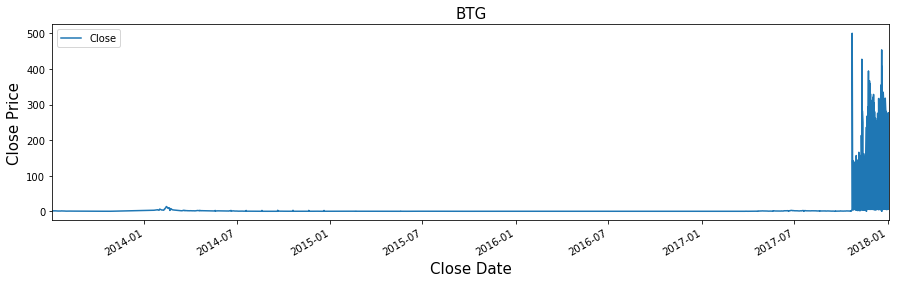

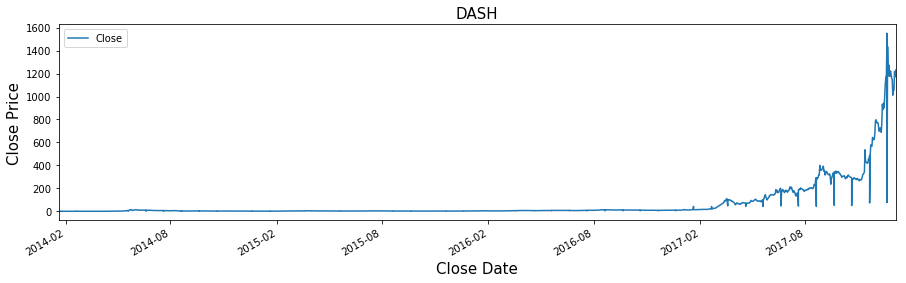

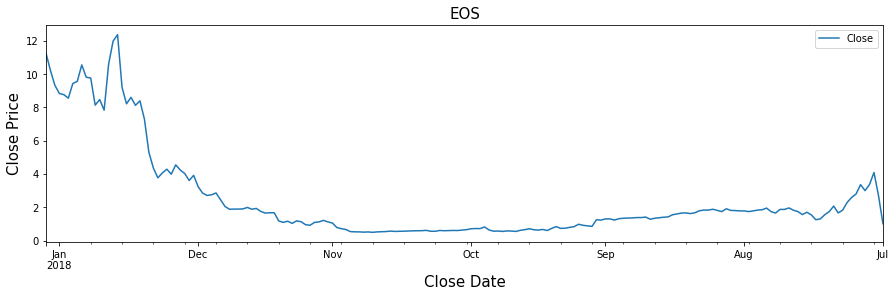

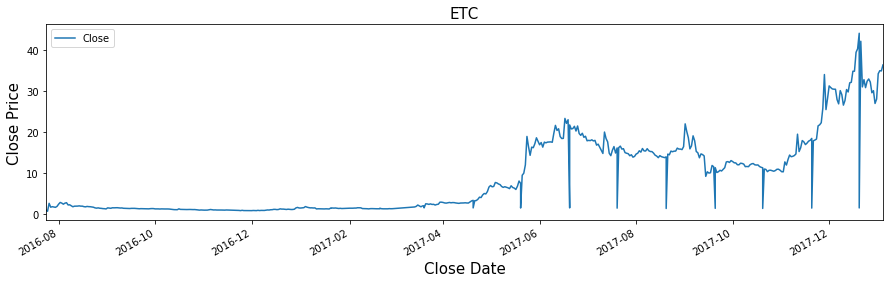

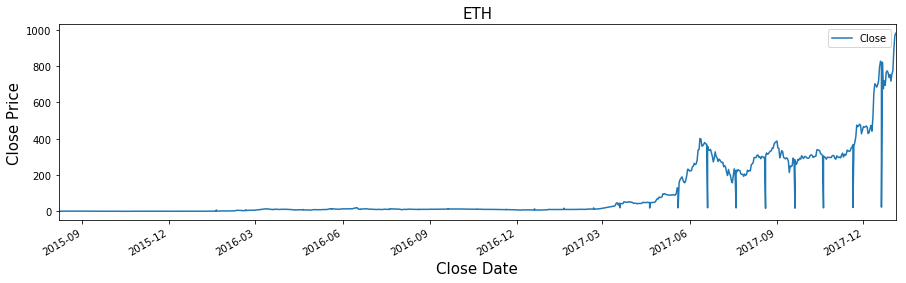

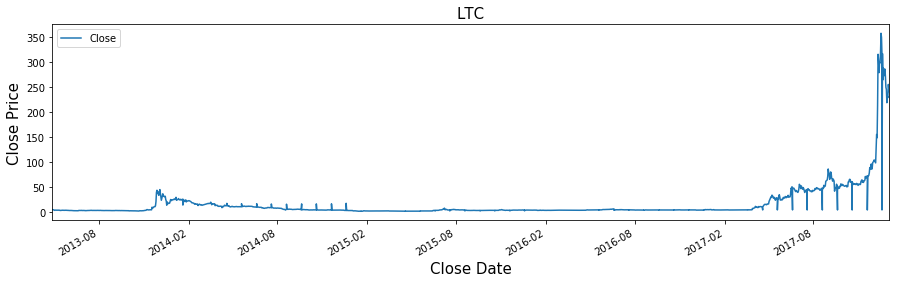

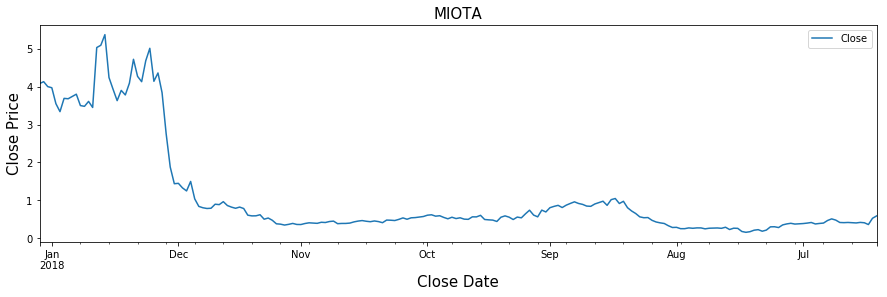

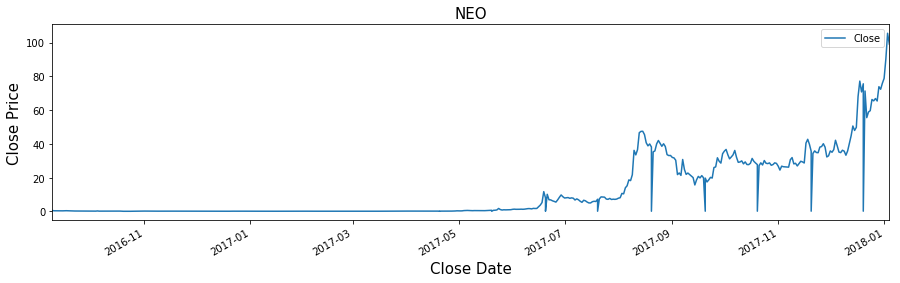

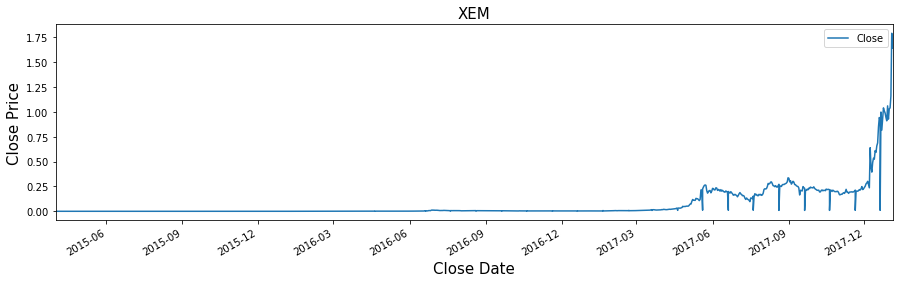

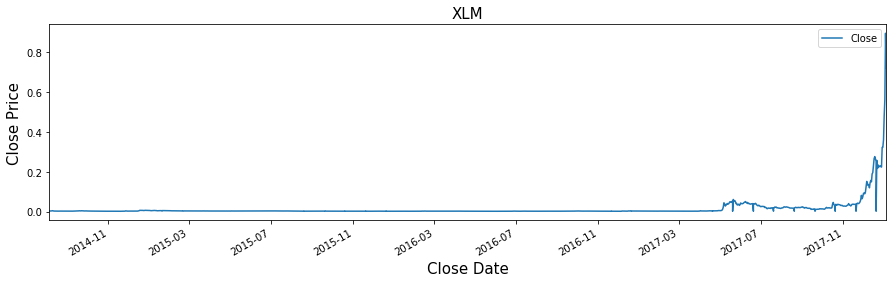

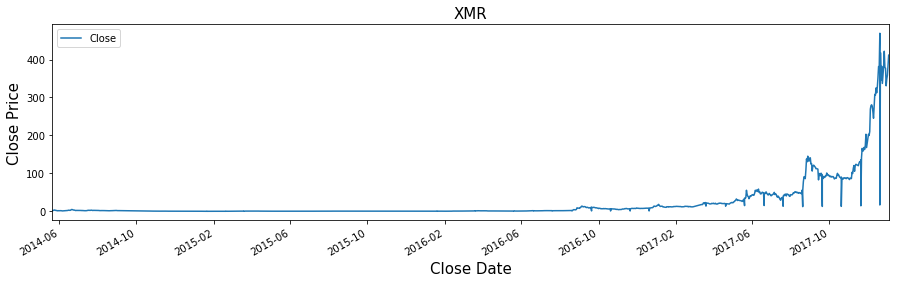

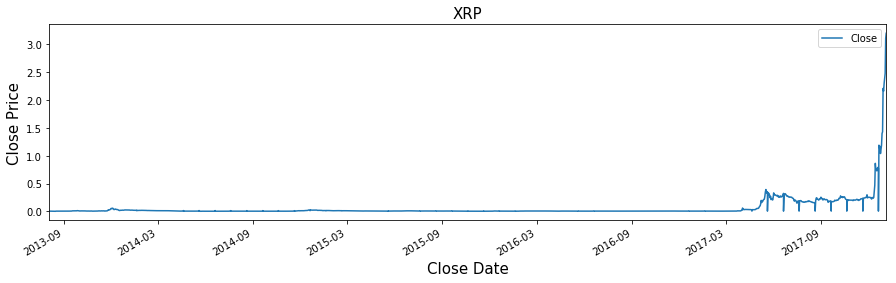

In [9]:
#use a foor loop to plot an individual graph for historic closing price data for each of the 15 cryptocurrencies
for name, group in top15.groupby("coin"):
    group.plot(figsize=(15,4))
    plt.ylabel("Close Price", fontsize = 15)
    plt.xlabel("Close Date", fontsize = 15)
    plt.title(name, fontsize = 15)

In [10]:
top5 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")
                      ,:]

top10 = crypto_df.loc[(crypto_df["coin"]=="DASH")|(crypto_df["coin"]=="XEM")|
                      (crypto_df["coin"]=="XMR")|(crypto_df["coin"]=="BTG")|
                      (crypto_df["coin"]=="ETC")
                      ,:]

final_top = crypto_df.loc[(crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:]

In [11]:
top5 = top5[["Date", "Close", "coin"]]
top10 = top10[["Date", "Close", "coin"]]
final_top = final_top[["Date", "Close", "coin"]]

In [12]:
top5.set_index(pd.to_datetime(top5["Date"], format = "%m/%d/%y"), inplace = True) 
top5["Date"]=pd.to_datetime(top5["Date"], format = "%m/%d/%y") 
top5 = top5.reset_index(drop=True)
top10.set_index(pd.to_datetime(top10["Date"], format = "%m/%d/%y"), inplace = True) 
top10["Date"]=pd.to_datetime(top10["Date"], format = "%m/%d/%y") 
top10 = top10.reset_index(drop=True)
final_top.set_index(pd.to_datetime(final_top["Date"], format = "%m/%d/%y"), inplace = True) 
final_top["Date"]=pd.to_datetime(final_top["Date"], format = "%m/%d/%y") 
final_top = final_top.reset_index(drop=True)

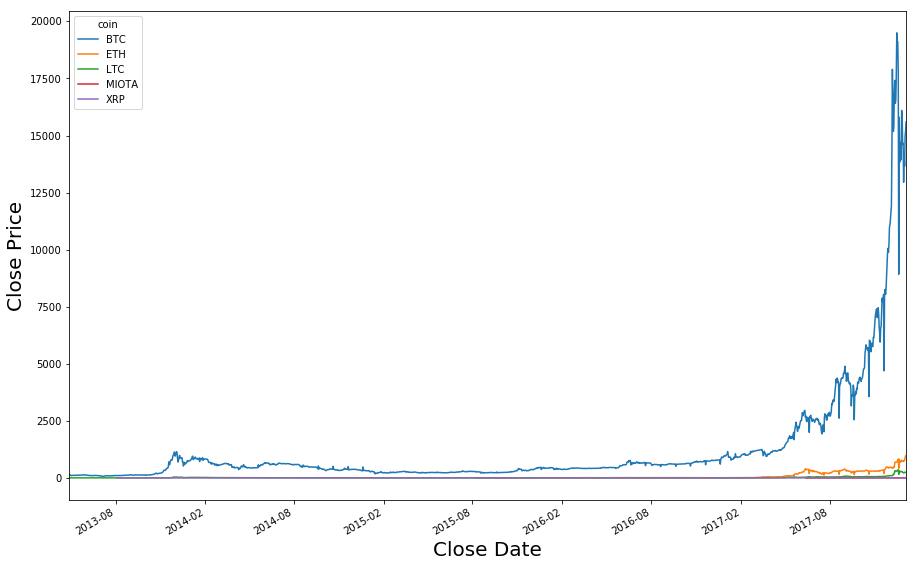

In [13]:
pd.pivot_table(top5, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Close Date", fontsize = 20)

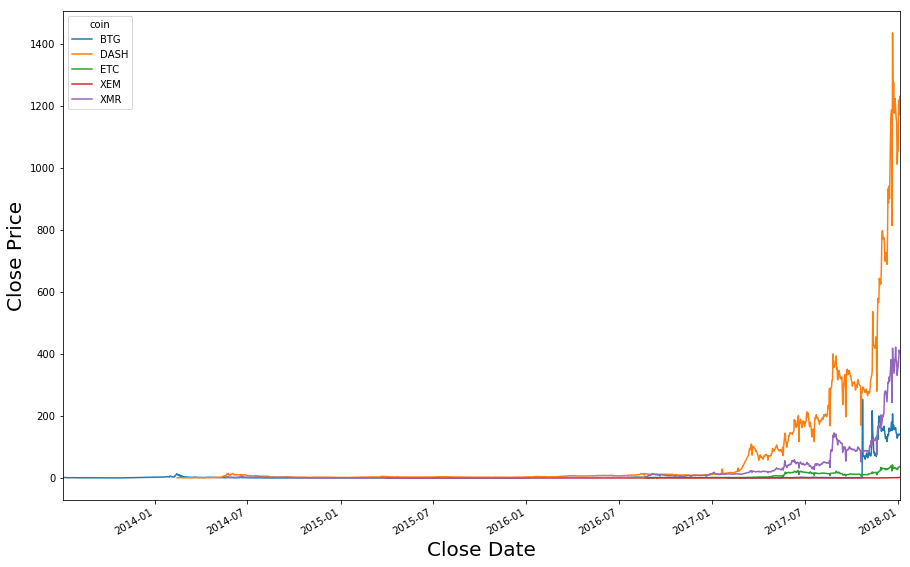

In [14]:
pd.pivot_table(top10, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Close Date", fontsize = 20)

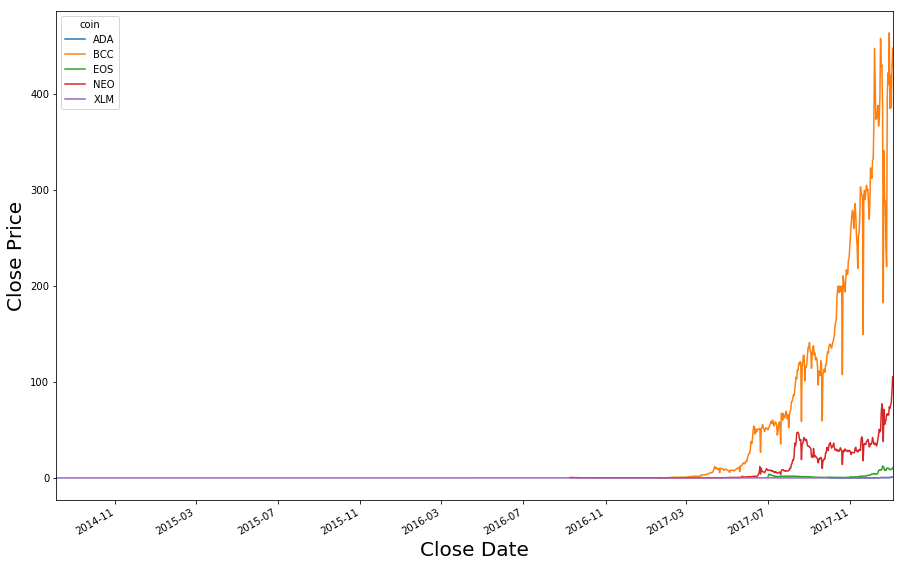

In [15]:
pd.pivot_table(final_top, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Close Date", fontsize = 20)

/anaconda/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'Date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


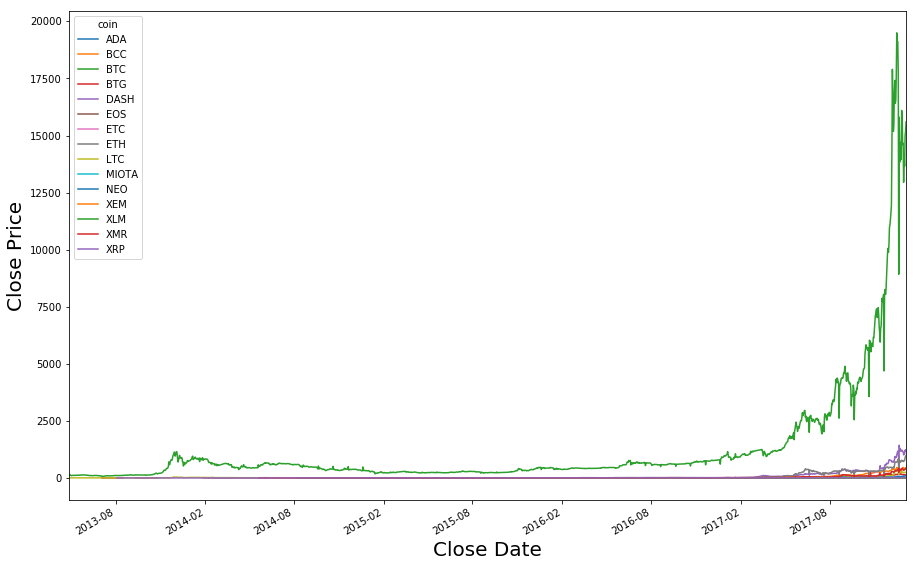

In [16]:
#Plotting all top15 coins together. All coins are trending upwards. 
#All coins experience the majority of their growth starting in the beginning of 2017.
pd.pivot_table(top15, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Close Date", fontsize = 20)